In [246]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

## Performing EDA ##
---
>table with customers

In [247]:
customers = pd.read_csv('olist_customers_dataset.csv')

In [248]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customers.shape

(99441, 5)

In [7]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [8]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

>table with orders

In [249]:
orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'] )

In [10]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [12]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [13]:
orders.shape

(99441, 8)

In [14]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [15]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

>table with order items

In [250]:
order_items = pd.read_csv('olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'] )

In [17]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [19]:
order_items.shape

(112650, 7)

In [20]:
order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [21]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

## 1. How many users made a purchase only once? ##
---

>merge the customer table with the orders table by customer_id

In [251]:
full_orders = customers.merge(orders, on= 'customer_id')

In [25]:
full_orders.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [26]:
full_orders.shape

(99441, 12)

>define what constitutes a completed purchase

In [29]:
full_orders.order_status.unique()

array(['delivered', 'canceled', 'invoiced', 'shipped', 'processing',
       'unavailable', 'approved', 'created'], dtype=object)

>check the number of orders by status

In [142]:
full_orders.groupby(['order_status']).order_id.count()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

>check the payment statuses

In [48]:
full_orders['is_paid'] = full_orders['order_approved_at'].apply(lambda x: not pd.isnull(x) and x != '')
full_orders['is_paid'].value_counts(normalize=True)

True     0.998391
False    0.001609
Name: is_paid, dtype: float64

In [64]:
rates = full_orders.groupby('order_status')['is_paid'].value_counts().to_frame()

In [66]:
rates

is_paid
order_status is_paid         
approved     True           2
canceled     True         484
             False        141
created      False          5
delivered    True       96464
             False         14
invoiced     True         314
processing   True         301
shipped      True        1107
unavailable  True         609

**What did we find??** <br>
- The largest number of orders are in the "delivered" status <br>
- There are 160 unpaid orders out of 99,281 = less than 1% of all orders.<br>
- Almost 100% of paid orders fall under the following statuses: "approved", "delivered", "invoiced", "processing", "shipped". There are also orders with the status "canceled," which can be canceled at any status (regardless of payment). There are also unpaid orders in the "delivered" status, which might be due to gifts or barter advertising. <br>

**Concluion::** <br>
- It is difficult to determine which orders are classified as unavailable, so they will not be included in the analysis. <br>
- Orders with the "canceled" status will still require refunds, so they will also be excluded from the analysis. <br>
- Orders with the created status are unpaid but might be paid later, so they can be included in the analysis. <br>

**Thus, we will consider completed purchases as orders with all statuses except "unavailable" and "canceled".**

>let's return to the main question and calculate the number of users who made a purchase only once.

In [88]:
customer_order = full_orders.query('order_status not in ["unavailable", "canceled"]')

In [89]:
customer_order.groupby(['customer_unique_id'], as_index = False)\
        .agg({'order_id':'count'})\
        .query("order_id == 1")\
        .rename(columns = {'order_id':'orders_number'}) \
        .shape[0]

92102

**Answer:** **92102** out of 96,096 users made only one purchase.

## 2. How many orders per month are, on average, not delivered for various reasons (provide a breakdown by reasons)?##
---

> recall that when we examined the data, there were missing values in the delivery dates.
The largest number of missing values was in the delivery time (order_delivered_customer_date), so we will consider those as undelivered.


In [253]:
undelivered = full_orders.query("order_delivered_customer_date == 'NaN'")

>see the reasons (order statuses) for which orders are most often not delivered.

In [193]:
undelivered.groupby('order_status').size()

order_status
approved          2
canceled        619
created           5
delivered         8
invoiced        314
processing      301
shipped        1107
unavailable     609
dtype: int64

>assume that orders with all statuses may be delivered later, except for "canceled" and "unavailable." We will update the dataframe and verify the data.

In [194]:
undelivered = full_orders.query("order_delivered_customer_date == 'NaN' and order_status in ('unavailable','canceled')")

In [195]:
undelivered.groupby('order_status').size()

order_status
canceled       619
unavailable    609
dtype: int64

In [196]:
undelivered.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_paid
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09,True
288,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaT,NaT,2017-03-10,True
373,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaT,NaT,2018-06-05,True
378,3ba47b09546c2da91ef141efce2d5888,b8c37ee810b38c416022e1c9f51e740c,32140,contagem,MG,a402af38a74c44926247db438245d95c,canceled,2018-01-30 22:12:10,2018-01-30 22:34:14,NaT,NaT,2018-03-06,True
380,cfffbb322333151f8df6398a8c3340db,0dc0731aafd5659410244092b0dc7d65,5093,sao paulo,SP,f63cd97f8f1db2eb266fb3bc2b4a95f3,canceled,2017-06-19 14:07:04,2017-06-19 14:23:18,NaT,NaT,2017-06-30,True


In [197]:
undelivered_apr = undelivered.groupby(["order_approved_at", "order_status"],as_index = False)\
    .agg({'order_id': 'count'})\
    .rename(columns = {'order_id':'orders_number'})
undelivered.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_paid
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09,True
288,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaT,NaT,2017-03-10,True
373,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaT,NaT,2018-06-05,True
378,3ba47b09546c2da91ef141efce2d5888,b8c37ee810b38c416022e1c9f51e740c,32140,contagem,MG,a402af38a74c44926247db438245d95c,canceled,2018-01-30 22:12:10,2018-01-30 22:34:14,NaT,NaT,2018-03-06,True
380,cfffbb322333151f8df6398a8c3340db,0dc0731aafd5659410244092b0dc7d65,5093,sao paulo,SP,f63cd97f8f1db2eb266fb3bc2b4a95f3,canceled,2017-06-19 14:07:04,2017-06-19 14:23:18,NaT,NaT,2017-06-30,True


In [198]:
undelivered_apr["months"] = undelivered_apr["order_approved_at" ].apply(lambda x:x.strftime("%m-%Y"))

In [199]:
undelivered_apr.head()

,order_approved_at,order_status,orders_number,months
0,2016-10-04 10:26:40,canceled,1,10-2016
1,2016-10-05 08:45:09,canceled,1,10-2016
2,2016-10-06 14:22:19,unavailable,1,10-2016
3,2016-10-06 15:50:56,canceled,1,10-2016
4,2016-10-06 15:54:47,canceled,1,10-2016


In [209]:
undelivered_month = undelivered_apr.groupby(["months", "order_status"],as_index = False).agg({'orders_number': 'sum'})
undelivered_month.head()

,months,order_status,orders_number
0,01-2017,canceled,2
1,01-2017,unavailable,8
2,01-2018,canceled,32
3,01-2018,unavailable,47
4,02-2017,canceled,15


In [213]:
undelivered_month = undelivered_month.groupby(["order_status"],as_index = False).agg({'orders_number': 'mean'}).round(0)
undelivered_month.head()

,order_status,orders_number
0,canceled,23.0
1,unavailable,29.0


**Conclusion:** On average, there are 23 orders per month not delivered due to the "canceled" status and 29 orders per month not delivered due to the "unavailable" status.

## 3. For each item, determine on which day of the week the item is most frequently purchased##
---

> merge the table with the items

In [281]:
df = full_orders.merge(order_items, on= 'order_id')

> extract the day of the week

In [282]:
df['day_of_week'] = df['order_approved_at'].dt.day_name()

In [283]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_of_week
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Sunday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday


> count the number of purchases

In [284]:
purchases = df.query('order_status not in ["unavailable", "canceled"]')\
    .groupby(["product_id", "day_of_week"],as_index = False).agg({'price': 'count'}).rename(columns = {'price':'quantity'})

In [285]:
purchases.head()

,product_id,day_of_week,quantity
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


In [286]:
most_popular_day = purchases.loc[purchases.groupby('product_id')['quantity'].idxmax()]\
    .sort_values(by='quantity',ascending=False)

In [289]:
most_popular_day.head()

,product_id,day_of_week,quantity
40850,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
20036,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
15844,422879e10f46682990de24d770e7f83d,Tuesday,89
36363,99a4788cb24856965c36a24e339b6058,Tuesday,82
12996,368c6c730842d78016ad823897a372db,Thursday,80


**Conclusion:** Customers most frequently make purchases on **Tuesdays**.

## 4. How many purchases does each user make on average per week (by month)? Keep in mind that a month might not contain a whole number of weeks.
---

>take our large dataframe with all the data, review it, and select the information we need for the analysis

In [254]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [264]:
purchase_by_week = df[['order_status', 'customer_unique_id', 'order_approved_at']]

>remove missing values.

In [265]:
purchase_by_week.dropna(inplace=True)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


> extract months from the date.

In [266]:
purchase_by_week["months"] = purchase_by_week["order_approved_at" ].apply(lambda x:x.strftime("%m-%Y"))

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [267]:
purchase_by_week.isna().sum()

order_status          0
customer_unique_id    0
order_approved_at     0
months                0
dtype: int64

In [268]:
purchase_by_week.head()

,order_status,customer_unique_id,order_approved_at,months
0,delivered,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,05-2017
1,delivered,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,01-2018
2,delivered,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,05-2018
3,delivered,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,03-2018
4,delivered,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,07-2018


>count the number of purchases per week

In [269]:
purchase_counts = purchase_by_week.query('order_status not in ["unavailable", "canceled"]')\
    .groupby(['customer_unique_id', 'months']).size().reset_index(name='purchase_count')

In [270]:
purchase_counts

,customer_unique_id,months,purchase_count
0,0000366f3b9a7992bf8c76cfdf3221e2,05-2018,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,05-2018,1
2,0000f46a3911fa3c0805444483337064,03-2017,1
3,0000f6ccb0745a6a4b88665a16c9f078,10-2017,1
4,0004aac84e0df4da2b147fca70cf8255,11-2017,1
...,...,...,...
96838,fffcf5a5ff07b0908bd4e2dbc735a684,06-2017,2
96839,fffea47cd6d3cc0a88bd621562a9d061,12-2017,1
96840,ffff371b4d645b6ecea244b27531430a,02-2017,1
96841,ffff5962728ec6157033ef9805bacc48,05-2018,1


> combine the purchase data with the number of weeks in each month.

In [271]:
purchase_by_week = purchase_by_week.merge(purchase_counts,how = "inner",on=['customer_unique_id'])

In [272]:
purchase_by_week.head()

,order_status,customer_unique_id,order_approved_at,months_x,months_y,purchase_count
0,delivered,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,05-2017,05-2017,1
1,delivered,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,01-2018,01-2018,1
2,delivered,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,05-2018,05-2018,1
3,delivered,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,03-2018,03-2018,1
4,delivered,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,07-2018,07-2018,1


In [273]:
purchase_by_week.drop("months_y",inplace=True,axis=1)


In [274]:
purchase_by_week.head()

,order_status,customer_unique_id,order_approved_at,months_x,purchase_count
0,delivered,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,05-2017,1
1,delivered,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,01-2018,1
2,delivered,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,05-2018,1
3,delivered,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,03-2018,1
4,delivered,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,07-2018,1


In [275]:
purchase_by_week['weeks_in_month'] = purchase_by_week['order_approved_at'].dt.days_in_month / 7
purchase_by_week.head()

,order_status,customer_unique_id,order_approved_at,months_x,purchase_count,weeks_in_month
0,delivered,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,05-2017,1,4.428571
1,delivered,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,01-2018,1,4.428571
2,delivered,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,05-2018,1,4.428571
3,delivered,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,03-2018,1,4.428571
4,delivered,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,07-2018,1,4.428571


>calculate the average number of purchases per week per customer.

In [279]:
purchase_by_week["mean_orders_per_week"] = purchase_by_week["purchase_count"] / purchase_by_week["weeks_in_month"]
purchase_by_week.round(3).sort_values('mean_orders_per_week', ascending = False)

,order_status,customer_unique_id,order_approved_at,months_x,purchase_count,weeks_in_month,mean_orders_per_week
50122,delivered,c8460e4251689ba205045f3ea17884a1,2018-08-08 09:05:09,08-2018,24,4.429,5.419
50118,delivered,c8460e4251689ba205045f3ea17884a1,2018-08-08 09:05:09,08-2018,24,4.429,5.419
50116,delivered,c8460e4251689ba205045f3ea17884a1,2018-08-08 14:10:16,08-2018,24,4.429,5.419
50115,delivered,c8460e4251689ba205045f3ea17884a1,2018-08-08 14:10:16,08-2018,24,4.429,5.419
50114,delivered,c8460e4251689ba205045f3ea17884a1,2018-08-08 14:10:16,08-2018,24,4.429,5.419
...,...,...,...,...,...,...,...
53949,delivered,c44868f5cf186fe0c2afbafa51e8a578,2017-07-27 11:50:20,07-2017,1,4.429,0.226
53948,delivered,fe5d59204b1e2953075779ed6a6fc20b,2018-08-04 10:15:18,08-2018,1,4.429,0.226
53947,delivered,61ef8f0d68325c9d33434d23239086ba,2018-08-02 17:30:24,08-2018,1,4.429,0.226
53946,delivered,355ff5c20316e13a8b29d6ffd27a1c96,2018-01-02 14:55:28,01-2018,1,4.429,0.226


## 5. (1) Perform a cohort analysis of users.

## 5. (2) Identify the cohort with the highest retention in the 3rd month from January to December.##
---


**What will we do??**
1. Review the data again and define the cohorts
2. Calculate the retention rate.
3. Identify the cohort with the highest retention in the 3rd month.

In [131]:
full_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


> divide users into cohorts based on the month in which they made their first purchase.

In [222]:
orders = full_orders[['customer_unique_id', 'order_approved_at']]

>check what data we have for the full year; it turns out we only have data for 2017.

In [223]:
orders['order_approved_at'].agg(['min', 'max'])

min   2016-09-15 12:16:38
max   2018-09-03 17:40:06
Name: order_approved_at, dtype: datetime64[ns]

In [224]:
orders.dtypes

customer_unique_id            object
order_approved_at     datetime64[ns]
dtype: object

> look at the percentage of users who ordered a product more than once. Only 3% of users ordered more than once.

In [225]:
count_orders = full_orders.groupby(['customer_unique_id'])['order_approved_at'].nunique()
orders_perc = np.sum(n_orders > 1) / full_orders['customer_unique_id'].nunique()
mult_orders_perc*100

2.851315351315351

>examine the distribution of orders on a graph.

[Text(0, 0.5, ' пользователи'),
 Text(0.5, 0, ' покупки'),
 Text(0.5, 1.0, 'Распределение количества покупок на пользоватя')]

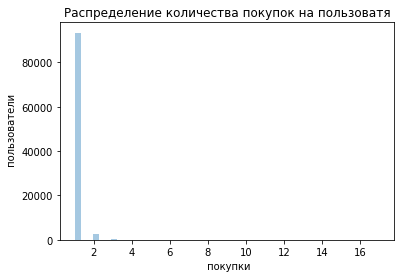

In [227]:
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Распределение количества покупок на пользоватя',
       xlabel=' покупки', 
       ylabel=' пользователи')

>create a column for the monthly cohort based on the user's first purchase date and the month of each subsequent purchase date.

In [228]:
orders['order_month'] = orders['order_approved_at'].dt.to_period('M')
orders['cohort'] = orders.groupby('customer_unique_id')['order_approved_at'] \
                 .transform('min') \
                 .dt.to_period('M') 

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


>filter the cohorts for 2017 and count the number of buyers who made a purchase.

In [229]:
orders_cohort = orders.query('order_status not in ["unavailable", "canceled"]' and 'cohort >= "2017-01" and cohort <= "2017-12"').groupby(['cohort', 'order_month']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)

In [230]:
orders_cohort.head()

,cohort,order_month,n_customers
0,2017-01,2017-01,726
1,2017-01,2017-02,4
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3


> calculate the difference between the date of each purchase and the first month.

In [231]:
orders_cohort['period_number'] = (orders_cohort.order_month - orders_cohort.cohort).apply(attrgetter('n'))

> create a pivot table to draw a heatmap.

In [232]:
cohort_pivot = orders_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [233]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort,,,,,,,,,,,,,,,,,,,
2017-01,726.0,4.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,2.0,2.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1736.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN
2017-03,2643.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN
2017-04,2323.0,14.0,5.0,4.0,7.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN
2017-05,3592.0,19.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,10.0,12.0,7.0,2.0,7.0,9.0,NaN,NaN,NaN
2017-06,3148.0,15.0,11.0,13.0,8.0,11.0,12.0,7.0,4.0,7.0,10.0,12.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN
2017-07,3843.0,20.0,13.0,8.0,13.0,7.0,12.0,4.0,7.0,9.0,9.0,12.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2017-08,4204.0,28.0,15.0,11.0,16.0,22.0,11.0,11.0,5.0,7.0,10.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4148.0,27.0,20.0,14.0,18.0,11.0,9.0,9.0,13.0,7.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> normalize the data, calculate the retention rates, and draw a retention matrix as a heatmap.

In [236]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [240]:
cohort_final = (retention_matrix
                .style
                .background_gradient(cmap='viridis')
                .highlight_null('white')
                .set_caption('Когортный анализ')
                .format("{:.2%}", na_rep=""))
cohort_final

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort,,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.55%,0.28%,0.14%,0.41%,0.14%,0.55%,0.14%,0.14%,,0.28%,0.28%,0.83%,0.41%,0.14%,0.14%,0.28%,0.41%,0.14%
2017-02,100.00%,0.23%,0.23%,0.17%,0.40%,0.12%,0.23%,0.17%,0.12%,0.23%,0.12%,0.29%,0.17%,0.17%,0.12%,0.06%,0.06%,0.23%,
2017-03,100.00%,0.49%,0.34%,0.34%,0.34%,0.15%,0.15%,0.30%,0.30%,0.11%,0.38%,0.15%,0.23%,0.11%,0.15%,0.23%,0.08%,0.15%,
2017-04,100.00%,0.60%,0.22%,0.17%,0.30%,0.26%,0.34%,0.26%,0.34%,0.17%,0.22%,0.09%,0.09%,0.04%,0.09%,0.09%,0.22%,,
2017-05,100.00%,0.53%,0.50%,0.39%,0.31%,0.33%,0.42%,0.17%,0.25%,0.31%,0.28%,0.33%,0.19%,0.06%,0.19%,0.25%,,,
2017-06,100.00%,0.48%,0.35%,0.41%,0.25%,0.35%,0.38%,0.22%,0.13%,0.22%,0.32%,0.38%,0.16%,0.13%,0.19%,,,,
2017-07,100.00%,0.52%,0.34%,0.21%,0.34%,0.18%,0.31%,0.10%,0.18%,0.23%,0.23%,0.31%,0.13%,0.26%,,,,,
2017-08,100.00%,0.67%,0.36%,0.26%,0.38%,0.52%,0.26%,0.26%,0.12%,0.17%,0.24%,0.17%,0.12%,,,,,,
2017-09,100.00%,0.65%,0.48%,0.34%,0.43%,0.27%,0.22%,0.22%,0.31%,0.17%,0.27%,0.07%,,,,,,,


**Conclusion:** The highest retention in the 3rd month is for the cohort from June 2017. Retention is highest in the initial months. However, considering that only 3% of customers place more than one order and the retention rate is below 1%, this is very low. The company clearly needs to work on improving customer retention through marketing activations.

## 6. RFM Analysis

---

>take the df with all the data, remove missing values, and filter the purchases

In [309]:
df_rfm = df.dropna().query('order_status not in ["unavailable", "canceled"]')

In [310]:
df_rfm.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_of_week
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Sunday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday


> determine the current date as the maximum purchase date plus one day.

In [313]:
from datetime import timedelta
today = df_rfm.order_approved_at.max() + timedelta(days=1)
today

Timestamp('2018-08-30 15:10:26')

> Calculate the metrics for Recency, Frequency, and Monetary Value:<br> 
**R** - the time from the user's last purchase to the current date, <br> 
**F** - the total number of purchases by the user over all time,<br>
**M** - the total amount spent by the user over all time. <br>

In [325]:
rfm = df_rfm.groupby(['customer_unique_id'], as_index = False) \
    .agg({'order_approved_at': lambda x:(today - x.max()).days, 'order_id': 'count', 'price': 'sum'}) \
    .rename(columns = {'order_approved_at': 'recency', 'order_id': 'frequency', 'price': 'monetary'})

In [326]:
rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00
...,...,...,...,...
93331,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,1570.00
93332,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89
93333,ffff371b4d645b6ecea244b27531430a,568,1,89.90
93334,ffff5962728ec6157033ef9805bacc48,119,1,115.00


> use quantiles for segmentation.

In [322]:
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([0.20, 0.40, 0.60, 0.80])
quintiles

,recency,frequency,monetary
0.2,92.0,1.0,39.9
0.4,177.0,1.0,69.9
0.6,268.0,1.0,109.9
0.8,382.0,1.0,179.9


> users most frequently make only one purchase, and all quantiles are the same. Segmentation will need to be done manually.

In [321]:
rfm.frequency.value_counts()

1     81728
2      8795
3      1646
4       621
5       241
6       190
7        45
8        16
10       11
11       11
9        10
12        9
14        3
15        3
13        2
20        2
21        1
18        1
24        1
Name: frequency, dtype: int64

In [331]:
def r_score(x):
    if x <= quintiles['recency'][0.20]:
        return 5
    elif x <= quintiles['recency'][0.40]:
        return 4
    elif x <= quintiles['recency'][0.60]:
        return 3
    elif x <= quintiles['recency'][0.80]:
        return 2
    else:
        return 1

def m_score(x, c):
    if x <= quintiles[c][0.20]:
        return 1
    elif x <= quintiles[c][0.40]:
        return 2
    elif x <= quintiles[c][0.60]:
        return 3
    elif x <= quintiles[c][0.80]:
        return 4
    else:
        return 5    

In [335]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

In [336]:
rfm

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,5,215
...,...,...,...,...,...,...,...,...
93331,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,1570.00,1,5,5,155
93332,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,3,1,2,312
93333,ffff371b4d645b6ecea244b27531430a,568,1,89.90,1,1,3,113
93334,ffff5962728ec6157033ef9805bacc48,119,1,115.00,4,1,4,414


In [337]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,4,414,promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,4,1,1,411,promising
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211,hibernating
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,5,215,hibernating


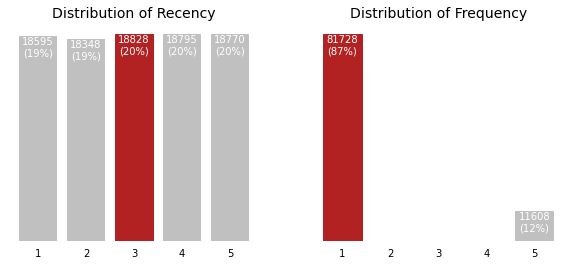

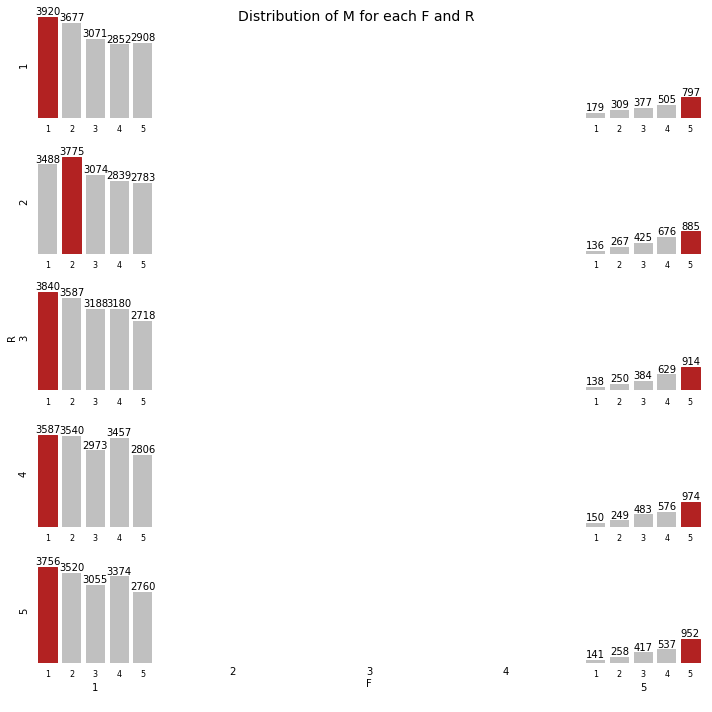

In [338]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()


See that while recency seems to be evenly distributed, almost half of the customers make purchases infrequently (38% of customers have a frequency of 1 or 2). Nearly all customers make only one purchase (87% of customers). Looking at the monetary value, we see that the highest spenders are the customers with the lowest activity (R and F = 1). We have very few large orders (low average order value, but high frequency).

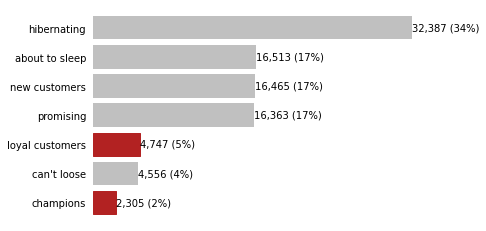

In [340]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

**Conclusion** There are very few loyal customers and champions (only 7%), with half being inactive customers (51%). There are new and promising customers (34%). The data needs to be sent to the marketing department. The strategy should be to re-engage inactive customers, retain new customers, convert promising customers, and retain valuable ones.